# Content and Objective

+ Show results of filter design by Fourier approximation and Remez
+ Filters of two different orders are designed and frequency responses are shown

# Import

In [1]:
# importing
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 10) )

# Filter Design by Fourier Approximation

### parameters

In [3]:
# sampling time
t_s = 1.
f_s = 1. / t_s

N_fft = 2048
f = np.arange( -f_s/2, f_s/2, f_s/N_fft)    

# end of passband and filter length
f_g = f_s/3
K_1 = 21
K_2 = 105    

### design filters

In [4]:
CASE = 0 #Create Ideal Spectrum of lenght N_fft, calculate IDFT and cut as many samples as needed (K_1 and K_2)
#CASE = 1 #Create Ideal Spectrum of lenght K_1 and K_2 and calculate IDFT

if(CASE == 0):
    # define ideal lowpass in the frequency regime
    H_w = np.zeros(N_fft)
    H_w[ np.where( np.abs(f)<f_g) ] = 1
    
    # find impulse response by IFFT and restricting to K values
    h_1_part = np.fft.ifft( H_w*np.exp(-1j*2*np.pi*f*(K_1-1)/2), N_fft)[:(K_1+1)//2]
    h_1 = np.append( h_1_part, (h_1_part[::-1])[1:])
    #h /= np.linalg.norm(h)
    
    h_2_part = np.fft.ifft( H_w*np.exp(-1j*2*np.pi*f*(K_2-1)/2), N_fft)[:(K_2+1)//2]
    h_2 = np.append( h_2_part, (h_2_part[::-1])[1:])#, h_2_part)
    #h_2 /= np.linalg.norm(h_2)        
    
    # find frequency responses
    freq, H_1 = signal.freqz(h_1, worN=f*2*np.pi, whole=True) 
    H_1 = np.fft.fftshift(H_1)
    
    freq, H_2 = signal.freqz(h_2, worN=f*2*np.pi, whole=True)
    H_2 = np.fft.fftshift(H_2)
    
if(CASE == 1):
    # -f_s/2 ... -f_s/3 ... 0 ... f_s/3 ... f_s/2
    # -3/3   ...  -2/3  ... 0 ...  2/3  ... 3/3
    # -10    ...  ~-6   ... 0 ...  ~6   ... 10

    #                       Stopband neg             Passband neg            Passband pos(+1 due to uneven count) Stopband pos
    H_soll_1 = np.hstack( (np.zeros(int(1/3*K_1/2)), np.ones(int(2/3*K_1/2)), np.ones(int(2/3*(K_1)/2)+1), np.zeros(int(1/3*K_1/2))) )
    
    H_soll_1 = np.fft.fftshift(H_soll_1)
    h_1      = np.fft.ifft(H_soll_1)
    h_1      = np.fft.fftshift(h_1)

    H_soll_2 = np.hstack( (np.zeros(int(1/3*K_2/2)), np.ones(int(2/3*K_2/2)), np.ones(int(2/3*(K_2)/2)+1), np.zeros(int(1/3*K_2/2))) )
    
    H_soll_2 = np.fft.fftshift(H_soll_2)
    h_2      = np.fft.ifft(H_soll_2)
    h_2      = np.fft.fftshift(h_2)


    # find frequency responses
    freq, H_1 = signal.freqz(h_1, worN=f*2*np.pi, whole=True)   
    freq, H_2 = signal.freqz(h_2, worN=f*2*np.pi, whole=True)
    

### plotting

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_178378/2145023733.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$f/\mathrm{Hz}$')
/tmp/ipykernel_178378/2145023733.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$f/\mathrm{Hz}$')
/usr/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, '$|H(f)| \\; (dB)$')

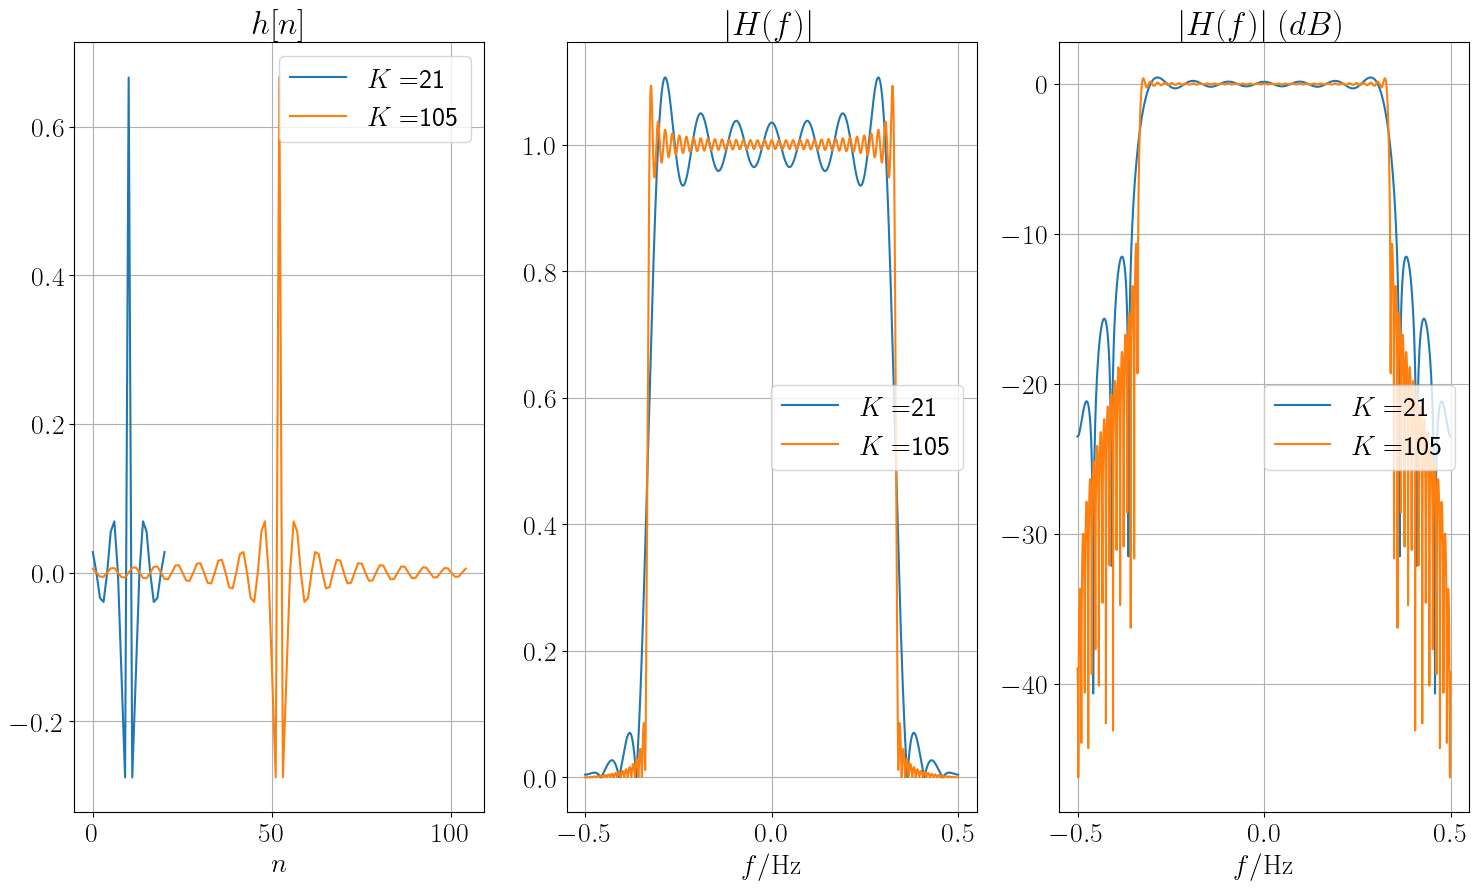

In [5]:
# plotting
plt.figure(1)
plt.clf()

plt.subplot(131)
plt.plot( np.arange(len(h_1)), h_1, label='$K=$'+str(K_1))
plt.plot( np.arange(len(h_2)), h_2, label='$K=$'+str(K_2))    
plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('$n$')
plt.title('$h[n]$')

plt.subplot(132)
plt.plot( f, np.abs(H_1), label='$K=$'+str(K_1))
plt.plot( f, np.abs(H_2), label='$K=$'+str(K_2))    
plt.grid(True)   
plt.legend(loc='center right')    
plt.xlabel('$f/\mathrm{Hz}$')
plt.title('$|H(f)|$')    

plt.subplot(133)
plt.plot( f, 10*np.log10(np.abs(H_1)), label='$K=$'+str(K_1))
plt.plot( f, 10*np.log10(np.abs(H_2)), label='$K=$'+str(K_2))    
plt.grid(True)   
plt.legend(loc='center right')    
plt.xlabel('$f/\mathrm{Hz}$')
plt.title('$|H(f)| \\; (dB)$')  

# Filter Design by Remez

### parameters

In [6]:
# sampling time
t_s = 1.
f_s = 1. / t_s

N_fft = 2048
f = np.arange( -f_s/2, f_s/2, f_s/N_fft)    

# end of passband and filter length
f_g = f_s/3
K_1 = 11
K_2 = 51    

### design filters

In [7]:
# find impulse response 
h = signal.remez( K_1, [0, f_g, 1.2*f_g, .5], [1,0])
h_2 = signal.remez(K_2, [0, f_g, 1.2*f_g, .5], [1,0])    

# find frequency responses
freq, H = signal.freqz(h, worN=f*2*np.pi, whole=True) 
freq, H_2 = signal.freqz(h_2, worN=f*2*np.pi, whole=True)

### plotting

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_178378/1797279794.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$f/\mathrm{Hz}$')
/tmp/ipykernel_178378/1797279794.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$f/\mathrm{Hz}$')


Text(0.5, 1.0, '$|H(f)| \\; (dB)$')

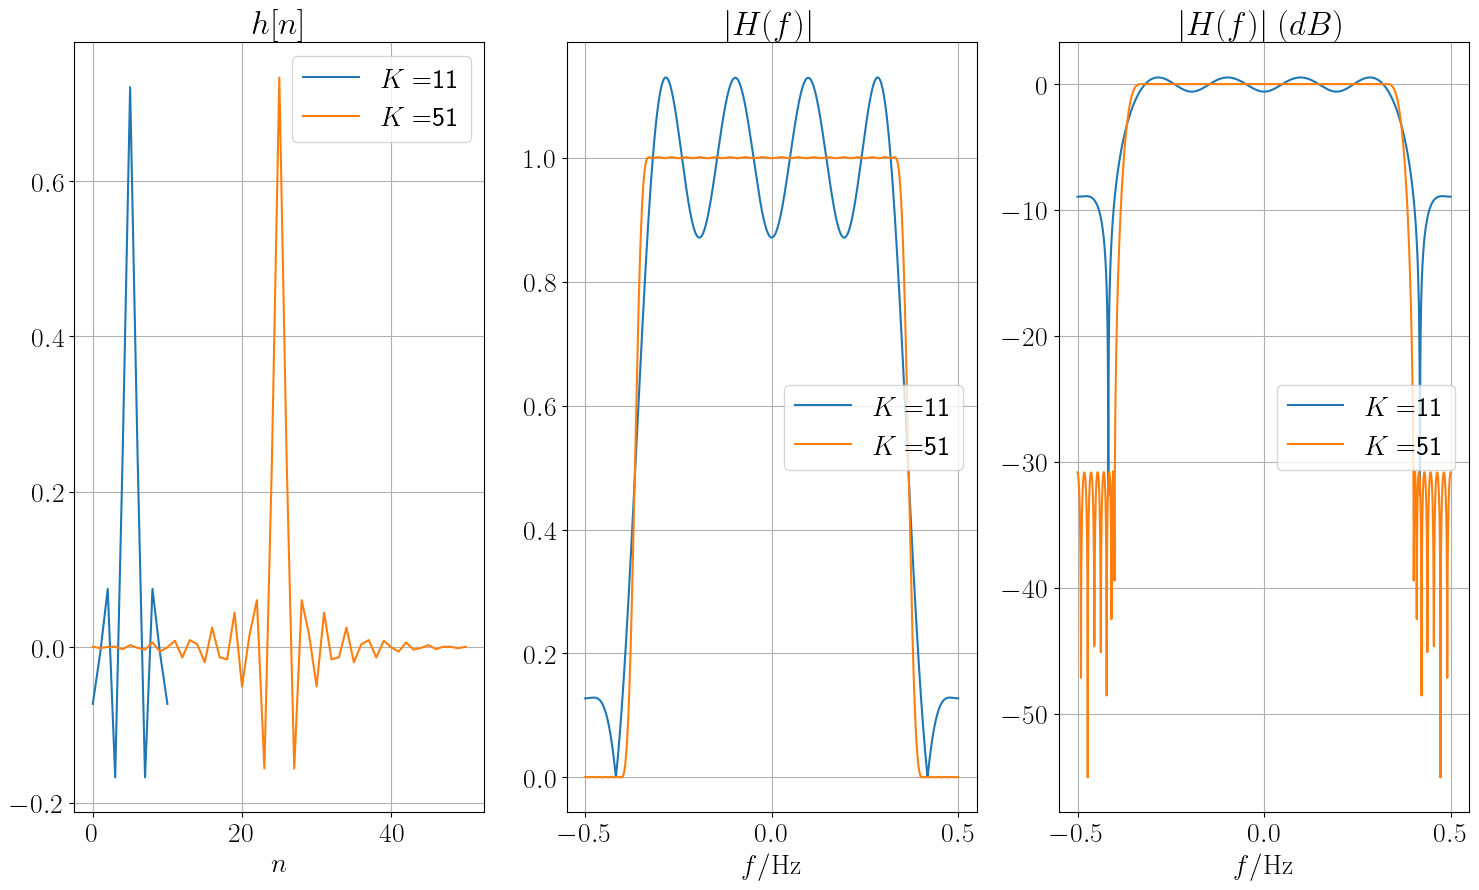

In [8]:
# plotting
plt.figure(1)
plt.clf()

plt.subplot(131)
plt.plot( np.arange(len(h)), h, label='$K=$'+str(K_1))
plt.plot( np.arange(len(h_2)), h_2, label='$K=$'+str(K_2))    
plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('$n$')
plt.title('$h[n]$')

plt.subplot(132)
plt.plot( f, np.abs(H), label='$K=$'+str(K_1))
plt.plot( f, np.abs(H_2), label='$K=$'+str(K_2))    
plt.grid(True)   
plt.legend(loc='center right')    
plt.xlabel('$f/\mathrm{Hz}$')
plt.title('$|H(f)|$')    

plt.subplot(133)
plt.plot( f, 10*np.log10(np.abs(H)), label='$K=$'+str(K_1))
plt.plot( f, 10*np.log10(np.abs(H_2)), label='$K=$'+str(K_2))    
plt.grid(True)   
plt.legend(loc='center right')    
plt.xlabel('$f/\mathrm{Hz}$')
plt.title('$|H(f)| \\; (dB)$') 